<a href="https://colab.research.google.com/github/MohemdElmokhtar-cheikh/Diagnostic_Maladie/blob/main/imagerieMedicale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

import cv2

In [2]:
from keras.layers import  Dense ,Flatten ,Dropout ,Activation
from keras.layers import  Conv2D ,MaxPooling2D

from keras.layers import BatchNormalization

#from keras.models import  Model
from keras.models import  Sequential


from keras.preprocessing import image
#from keras.preprocessing.image import ImageDataGenerator

#resize all the images to this 
IMAGE_SIZE=112


In [3]:
#from google.colab import drive
#drive.mount('/content/drive/')

In [4]:
data_brit = pd.read_csv('/content/drive/MyDrive/Kaggle/odir5k_data/full_df.csv')
print(data_brit.shape)

data= data_brit.iloc[:3194]

data = data.set_index('ID')
data.shape

(6392, 19)


(3194, 18)

In [5]:
#charger les dataset
x = np.load('/content/drive/MyDrive/Kaggle/odir5k_data/target/data_19class_X.npy')
y = np.load('/content/drive/MyDrive/Kaggle/odir5k_data/target/dict_target_19class_d')


In [ ]:
k=len(y)
long=len(y[0])

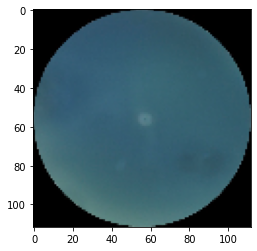

In [6]:
#afficher quelque photo de notre data set

plt.imshow(x[0])

In [7]:
#la normalisation des photo
x=x/255.0

In [8]:
#diviser le datata set
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [9]:
#cree notre reseaux de nerone
model= Sequential()

model.add(Conv2D(filters=16,kernel_size=(5,5),activation='relu',input_shape=(IMAGE_SIZE,IMAGE_SIZE,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.005))

model.add(Conv2D(filters=32,kernel_size=(5,5),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.005))

model.add(Conv2D(filters=64,kernel_size=(5,5),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.005))

model.add(Conv2D(filters=128,kernel_size=(5,5),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.005))


model.add(Flatten())

model.add(Dense(128 ,Activation('relu')))
model.add(Dropout(0.01))

model.add(Dense(57 ,Activation('relu')))
model.add(Dropout(0.01))

model.add(Dense(long ,activation='sigmoid'))



In [10]:
#view the structur of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 108, 108, 16)      1216      
_________________________________________________________________
batch_normalization (BatchNo (None, 108, 108, 16)      64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 54, 54, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 54, 54, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 32)        12832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 25, 25, 32)        1

In [11]:
#on compile le model
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])


In [ ]:
history = model.fit(x_train,y_train,batch_size=1,epochs=1000,validation_data=(x_test,y_test),verbose=1 )


Epoch 1/1000
4976/4976 [==============================] - 174s 35ms/step - loss: 0.1452 - accuracy: 0.4000 - val_loss: 0.1634 - val_accuracy: 0.4458
Epoch 2/1000
4976/4976 [==============================] - 171s 34ms/step - loss: 0.1248 - accuracy: 0.4262 - val_loss: 0.4712 - val_accuracy: 0.4458
Epoch 3/1000
4976/4976 [==============================] - 170s 34ms/step - loss: 0.1200 - accuracy: 0.4414 - val_loss: 0.1928 - val_accuracy: 0.4217
Epoch 4/1000
4976/4976 [==============================] - 171s 34ms/step - loss: 0.1137 - accuracy: 0.4762 - val_loss: 0.1566 - val_accuracy: 0.4506
Epoch 5/1000
4976/4976 [==============================] - 171s 34ms/step - loss: 0.1123 - accuracy: 0.4725 - val_loss: 0.1909 - val_accuracy: 0.4281
Epoch 6/1000
4976/4976 [==============================] - 170s 34ms/step - loss: 0.1122 - accuracy: 0.4774 - val_loss: 0.7142 - val_accuracy: 0.3727
Epoch 7/1000
2583/4976 [==============>...............] - ETA: 1:17 - loss: 0.1123 - accuracy: 0.4643

In [ ]:
loss,accuracy = model.evaluate(x_test,y_test)
print("loss:",loss)
print("Accuracy:",accuracy)

In [ ]:
def plot_accuracy_and_loss(train_model):
    hist = train_model.history
    acc = hist['accuracy']
    val_acc = hist['val_accuracy']
    loss = hist['loss']

    val_loss = hist['val_loss']
    epochs = range(len(acc))
    f, ax = plt.subplots(1,2, figsize=(14,6))
    ax[0].plot(epochs, acc, 'g', label='Training accuracy')
    ax[0].plot(epochs, val_acc, 'r', label='Validation accuracy')
    ax[0].set_title('Training and validation accuracy')
    ax[0].legend()
    ax[1].plot(epochs, loss, 'g', label='Training loss')
    ax[1].plot(epochs, val_loss, 'r', label='Validation loss')
    ax[1].set_title('Training and validation loss')
    ax[1].legend()
    plt.show()
plot_accuracy_and_loss(history)

In [ ]:
#fair des prediction
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
y_pred = model.predict(x_test)

In [ ]:
y_pred[2]

In [ ]:
y_test[2]